### Exercício Clusterização

Aluno: **Pedro Henrique Rodrigues de Lima**

## Objetivos

    Uma operadora de seguro de saúde sabe da forte influência do peso, gênero e nível de colesterol no desenvolvimento de doenças cardíacas. O objetivo dessa atividade é identificar perfis de indivíduos com maior risco para sobrepeso e colesterol alto.
    Para alcançar este objetivo, iremos utilizar o modelo agrupamento pelo algoritmo das K-Means. Então nosso objetivo se torna encontrar grupos de indivíduos (clusters) e definir os limites entre o grupo saudável e o grupo de risco.
    A base possui os atributos peso, colesterol e gênero. Peso e colesterol são atributos numéricos. Na variável gênero, 1 corresponde ao sexo masculino e 0 ao feminino.


## Importação das bibliotecas e leitura dos dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Atividade - Clusterizacao - Saude.xlsx', sheet_name=0)


In [3]:
data.head()

,Peso,Colesterol,Genero
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [4]:
data.shape

(547, 3)

In [5]:
data.describe()

,Peso,Colesterol,Genero
count,547.000000,547.000000,547.000000
mean,143.572212,170.433272,0.513711
std,30.837275,39.147189,0.500269
min,95.000000,102.000000,0.000000
25%,116.000000,136.000000,0.000000
50%,140.000000,169.000000,1.000000
75%,171.000000,208.000000,1.000000
max,203.000000,235.000000,1.000000


<AxesSubplot:>

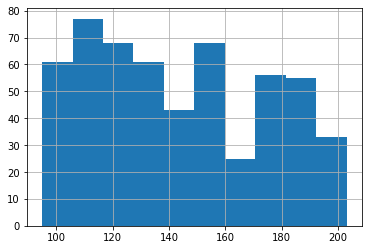

In [6]:
data['Peso'].hist()

<AxesSubplot:>

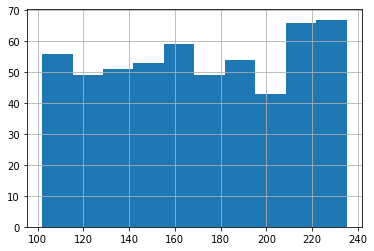

In [7]:
data['Colesterol'].hist()

## Testando divisão em 2 clusters

In [8]:
kmeans_model = KMeans(n_clusters=2,random_state = 42)

In [9]:
kmeans_model.fit(data)

KMeans(n_clusters=2, random_state=42)

In [10]:
centroides = kmeans_model.cluster_centers_

In [11]:
pd.DataFrame(centroides,index = [1,2], columns = [data.columns])

,Peso,Colesterol,Genero
1,119.073826,139.348993,0.479866
2,172.891566,207.634538,0.554217


Utilizando 2 clusters, temos 2 grupos, porém a divisão entre eles não está tão clara. O Gênero por exempplo, está com valores muito parecidos nos 2 grupos.

- Grupo 1 - Menor risco:
  - Peso médio = 119 (abaixo da média da população)
  - Colesterol médio = 139 (abaixo da média da população)
  - Gênero predominante: Feminino
  
  
- Grupo 2 - Maior risco:
  - Peso médio = 172 (acima da média da população)
  - Colesterol médio = 208 (acima da média da população)
  - Gênero predominante: Masculino

**Silhouette score com 2 clusters**

In [12]:
labels = kmeans_model.labels_
silhouette_score(data,labels)

0.6313844868675242

## Testando divisão em 4 clusters

In [13]:
kmeans_model = KMeans(n_clusters=4,random_state = 42)
kmeans_model.fit(data)
centroides = kmeans_model.cluster_centers_
pd.DataFrame(centroides,index = [1,2,3,4], columns = [data.columns])

,Peso,Colesterol,Genero
1,107.312925,120.442177,0.551020
2,185.074830,219.625850,0.578231
3,129.861111,156.993056,0.416667
4,154.614679,189.266055,0.504587


**Silhouette score com 4 clusters**

In [14]:
labels = kmeans_model.labels_
silhouette_score(data,labels)

0.57136192784364

Nota-se que o resultado com 4 clusters foi pior do que com 2 clusters, isso se deve provavelmente ao fato dos dados não estarem normalizados.

## Normalizando os dados

In [15]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [16]:
data_normalized = pd.DataFrame(data_normalized,index = range(0,data.shape[0]),columns = data.columns)

In [17]:
data_normalized.describe()

,Peso,Colesterol,Genero
count,547.000000,547.000000,547.000000
mean,0.449743,0.514536,0.513711
std,0.285530,0.294340,0.500269
min,0.000000,0.000000,0.000000
25%,0.194444,0.255639,0.000000
50%,0.416667,0.503759,1.000000
75%,0.703704,0.796992,1.000000
max,1.000000,1.000000,1.000000


In [18]:
n_cluster_dict = {}

for n in range(2,7):
    kmeans_model = KMeans(n_clusters=n,random_state = 42)
    kmeans_model.fit(data_normalized)
    labels = kmeans_model.labels_
    silhouette = silhouette_score(data_normalized,labels)
    n_cluster_dict[n] = silhouette
    
n_cluster_dict

{2: 0.5889441162904384,
 3: 0.6184076083065737,
 4: 0.6432944835931945,
 5: 0.6382051605648327,
 6: 0.6130918024555959}

Conclui-se então que **a melhor forma de divisão do modelo é em 4 clusters**, que é o valor para o qual o **score de silhueta atinge seu maior valor**, antes de começar a decair.

## Determinando os os limites para classificação de risco

In [19]:
kmeans_model = KMeans(n_clusters=4,random_state = 42)
kmeans_model.fit(data_normalized)
centroides = kmeans_model.cluster_centers_
centroides = pd.DataFrame(centroides,index = [1,2,3,4], columns = [data.columns])

In [20]:
centroides

,Peso,Colesterol,Genero
1,0.254600,0.319860,0.000000e+00
2,0.717394,0.787218,1.000000e+00
3,0.726215,0.802718,-3.330669e-16
4,0.187549,0.237775,1.000000e+00


In [21]:
data['cluster'] = kmeans_model.labels_

In [22]:
data.groupby('cluster').agg('mean')

,Peso,Colesterol,Genero
cluster,,,
0,122.496815,144.541401,0.0
1,172.478571,206.700000,1.0
2,173.431193,208.761468,0.0
3,115.255319,133.624113,1.0


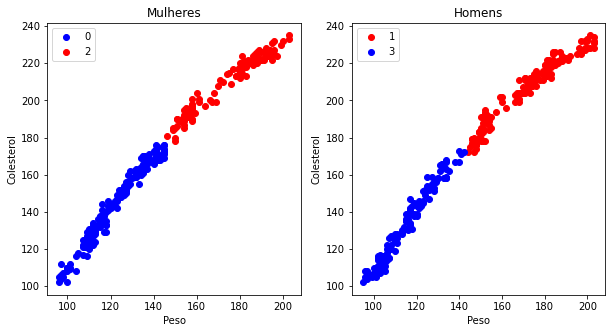

In [30]:
fig = plt.figure(figsize = (10,5))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)


ax1.scatter(data[['Peso']][(data['Genero'] == 1) & (data['cluster'] == 1)],
            data[['Colesterol']][(data['Genero'] == 1) & (data['cluster'] == 1)], c = 'red', label = 1)

ax1.scatter(data[['Peso']][(data['Genero'] == 1) & (data['cluster'] == 3)],
            data[['Colesterol']][(data['Genero'] == 1) & (data['cluster'] == 3)], c = 'blue', label = 3 )

ax0.scatter(data[['Peso']][(data['Genero'] == 0) & (data['cluster'] == 0)],
            data[['Colesterol']][(data['Genero'] == 0) & (data['cluster'] == 0)], c = 'blue', label = 0 )

ax0.scatter(data[['Peso']][(data['Genero'] == 0) & (data['cluster'] == 2)],
            data[['Colesterol']][(data['Genero'] == 0) & (data['cluster'] == 2)], c = 'red', label = 2 )

ax0.set_title('Mulheres')
ax1.set_title('Homens')

ax0.set_xlabel('Peso')
ax0.set_ylabel('Colesterol')

ax1.set_xlabel('Peso')
ax1.set_ylabel('Colesterol')

ax0.legend()
ax1.legend()

In [37]:
data.groupby(['Genero','cluster']).agg('max')

Peso  Colesterol
Genero cluster                  
0      0         145         176
       2         203         235
1      1         203         235
       3         142         173

Limites para as **mulheres** são: 
  * Peso = 145 e colesterol = 176


Limites para os **homens** são: 
   * Peso = 142 e colesterol = 173